In [111]:
#Import Packages
import os
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pmdarima.arima import auto_arima
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools import eval_measures
from sklearn.model_selection import train_test_split
from sklearn import linear_model as lm
from statsmodels.tsa.stattools import adfuller


from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
#Import Data
os.chdir("/Users/lexi/Desktop/Final_Project")
features_train = pd.read_csv("dengue_features_train.csv", index_col= [0, 1, 2])
labels_train = pd.read_csv("dengue_labels_train.csv", index_col= [0, 1, 2])
features_test = pd.read_csv("dengue_features_test.csv", index_col= [0, 1, 2])
submission = pd.read_csv("submission_format.csv")

In [3]:
features_train.dtypes

week_start_date                           object
ndvi_ne                                  float64
ndvi_nw                                  float64
ndvi_se                                  float64
ndvi_sw                                  float64
precipitation_amt_mm                     float64
reanalysis_air_temp_k                    float64
reanalysis_avg_temp_k                    float64
reanalysis_dew_point_temp_k              float64
reanalysis_max_air_temp_k                float64
reanalysis_min_air_temp_k                float64
reanalysis_precip_amt_kg_per_m2          float64
reanalysis_relative_humidity_percent     float64
reanalysis_sat_precip_amt_mm             float64
reanalysis_specific_humidity_g_per_kg    float64
reanalysis_tdtr_k                        float64
station_avg_temp_c                       float64
station_diur_temp_rng_c                  float64
station_max_temp_c                       float64
station_min_temp_c                       float64
station_precip_mm   

In [44]:
#Split cities
sj_train_features = features_train.loc['sj']
iq_train_features = features_train.loc['iq']

sj_test_features = features_test.loc['sj']
iq_test_features = features_test.loc['iq']

sj_train_labels = labels_train.loc['sj']
iq_train_labels = labels_train.loc['iq']



                 total_cases  week_m1  week_m2  week_m3
year weekofyear                                        
1990 18                    4      NaN      NaN      NaN
     19                    5      4.0      NaN      NaN
     20                    4      5.0      4.0      NaN
     21                    3      4.0      5.0      4.0
     22                    6      3.0      4.0      5.0
     23                    2      6.0      3.0      4.0
     24                    4      2.0      6.0      3.0
     25                    5      4.0      2.0      6.0
     26                   10      5.0      4.0      2.0
     27                    6     10.0      5.0      4.0
     28                    8      6.0     10.0      5.0
     29                    2      8.0      6.0     10.0
     30                    6      2.0      8.0      6.0
     31                   17      6.0      2.0      8.0
     32                   23     17.0      6.0      2.0
     33                   13     23.0     17.0  

In [133]:
sj_train_features.shape

(936, 21)

In [6]:
iq_train_features.shape

(520, 21)

In [7]:
#Data Cleaning
sj_train_features.isnull().sum()

week_start_date                            0
ndvi_ne                                  191
ndvi_nw                                   49
ndvi_se                                   19
ndvi_sw                                   19
precipitation_amt_mm                       9
reanalysis_air_temp_k                      6
reanalysis_avg_temp_k                      6
reanalysis_dew_point_temp_k                6
reanalysis_max_air_temp_k                  6
reanalysis_min_air_temp_k                  6
reanalysis_precip_amt_kg_per_m2            6
reanalysis_relative_humidity_percent       6
reanalysis_sat_precip_amt_mm               9
reanalysis_specific_humidity_g_per_kg      6
reanalysis_tdtr_k                          6
station_avg_temp_c                         6
station_diur_temp_rng_c                    6
station_max_temp_c                         6
station_min_temp_c                         6
station_precip_mm                          6
dtype: int64

In [8]:
iq_train_features.isnull().sum()

week_start_date                           0
ndvi_ne                                   3
ndvi_nw                                   3
ndvi_se                                   3
ndvi_sw                                   3
precipitation_amt_mm                      4
reanalysis_air_temp_k                     4
reanalysis_avg_temp_k                     4
reanalysis_dew_point_temp_k               4
reanalysis_max_air_temp_k                 4
reanalysis_min_air_temp_k                 4
reanalysis_precip_amt_kg_per_m2           4
reanalysis_relative_humidity_percent      4
reanalysis_sat_precip_amt_mm              4
reanalysis_specific_humidity_g_per_kg     4
reanalysis_tdtr_k                         4
station_avg_temp_c                       37
station_diur_temp_rng_c                  37
station_max_temp_c                       14
station_min_temp_c                        8
station_precip_mm                        16
dtype: int64

In [9]:
sj_train_features.fillna(method='ffill', inplace=True)
iq_train_features.fillna(method='ffill', inplace=True)

Text(0.5, 0, 'reanalysis_dew_point_temp_k')

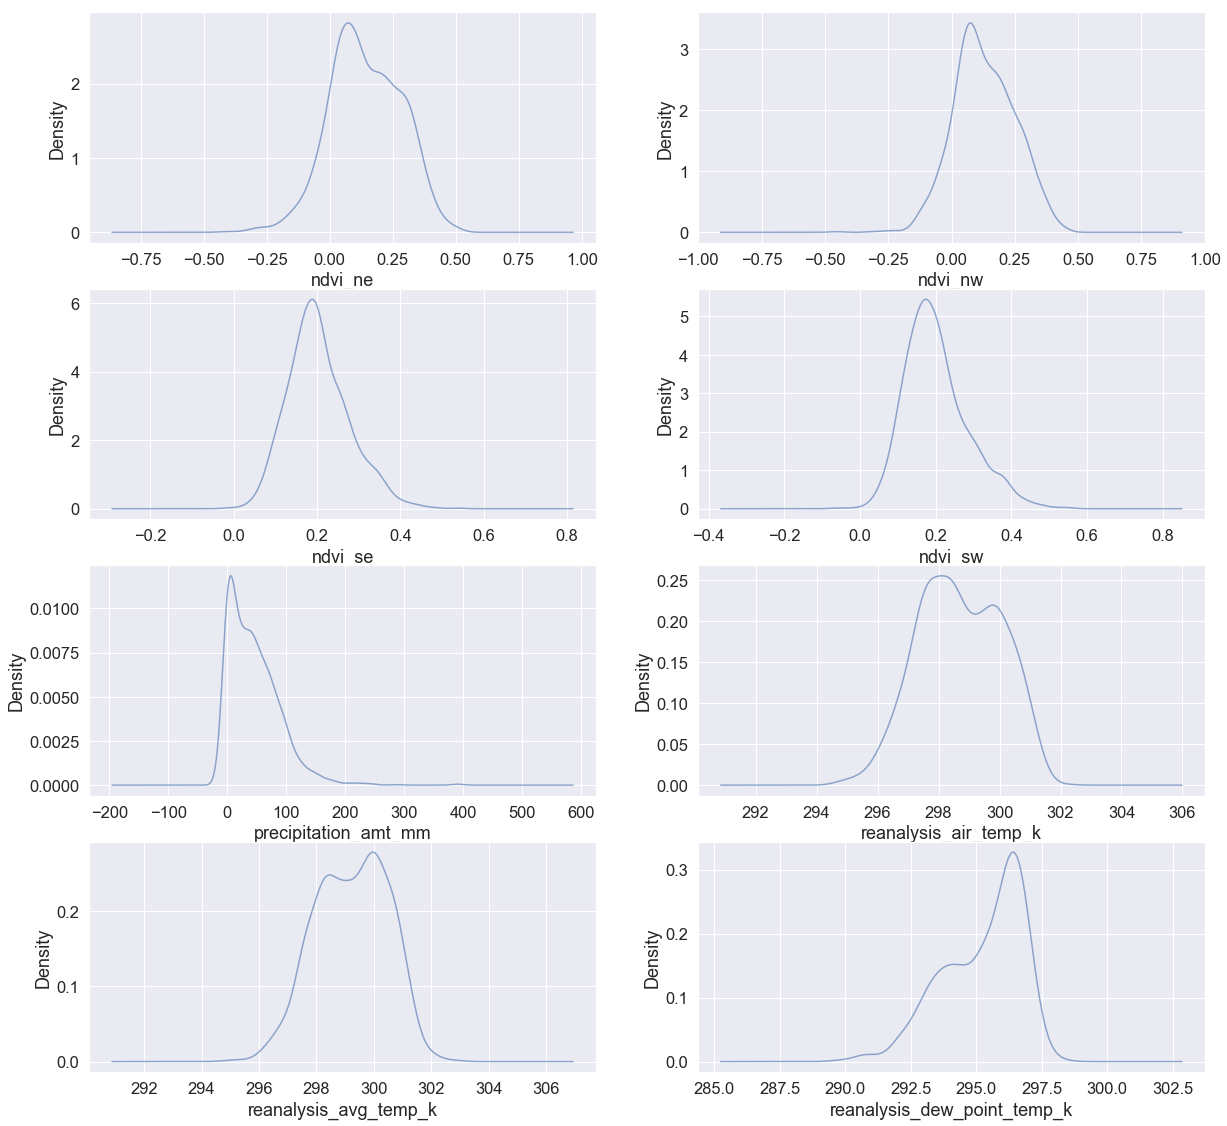

In [131]:
plt.rc("font", size=13)
plt.figure(figsize=(20,50))
alpha=0.6

#--------------------------------------------------#

ax1 = plt.subplot2grid((10,2), (0,0))
features_train.ndvi_ne.plot(kind="kde",alpha=alpha)
ax1.set_xlabel("ndvi_ne")

ax2 = plt.subplot2grid((10,2),(0,1))
features_train.ndvi_nw.plot(kind="kde",alpha=alpha)
ax2.set_xlabel("ndvi_nw")


ax3 = plt.subplot2grid((10,2),(1,0))
features_train.ndvi_se.plot(kind="kde",alpha=alpha)
ax3.set_xlabel("ndvi_se")

ax4 = plt.subplot2grid((10,2),(1,1))
features_train.ndvi_sw.plot(kind="kde",alpha=alpha)
ax4.set_xlabel("ndvi_sw")


ax5 = plt.subplot2grid((10,2),(2,0))
features_train.precipitation_amt_mm.plot(kind="kde",alpha=alpha)
ax5.set_xlabel("precipitation_amt_mm")

ax6 = plt.subplot2grid((10,2),(2,1))
features_train.reanalysis_air_temp_k.plot(kind="kde",alpha=alpha)
ax6.set_xlabel("reanalysis_air_temp_k")
ax7 = plt.subplot2grid((10,2),(3,0))
features_train.reanalysis_avg_temp_k.plot(kind="kde",alpha=alpha)
ax7.set_xlabel("reanalysis_avg_temp_k")

ax8 = plt.subplot2grid((10,2),(3,1))
features_train.reanalysis_dew_point_temp_k.plot(kind="kde",alpha=alpha)
ax8.set_xlabel("reanalysis_dew_point_temp_k")




Text(0.5, 0, 'station_precip_mm')

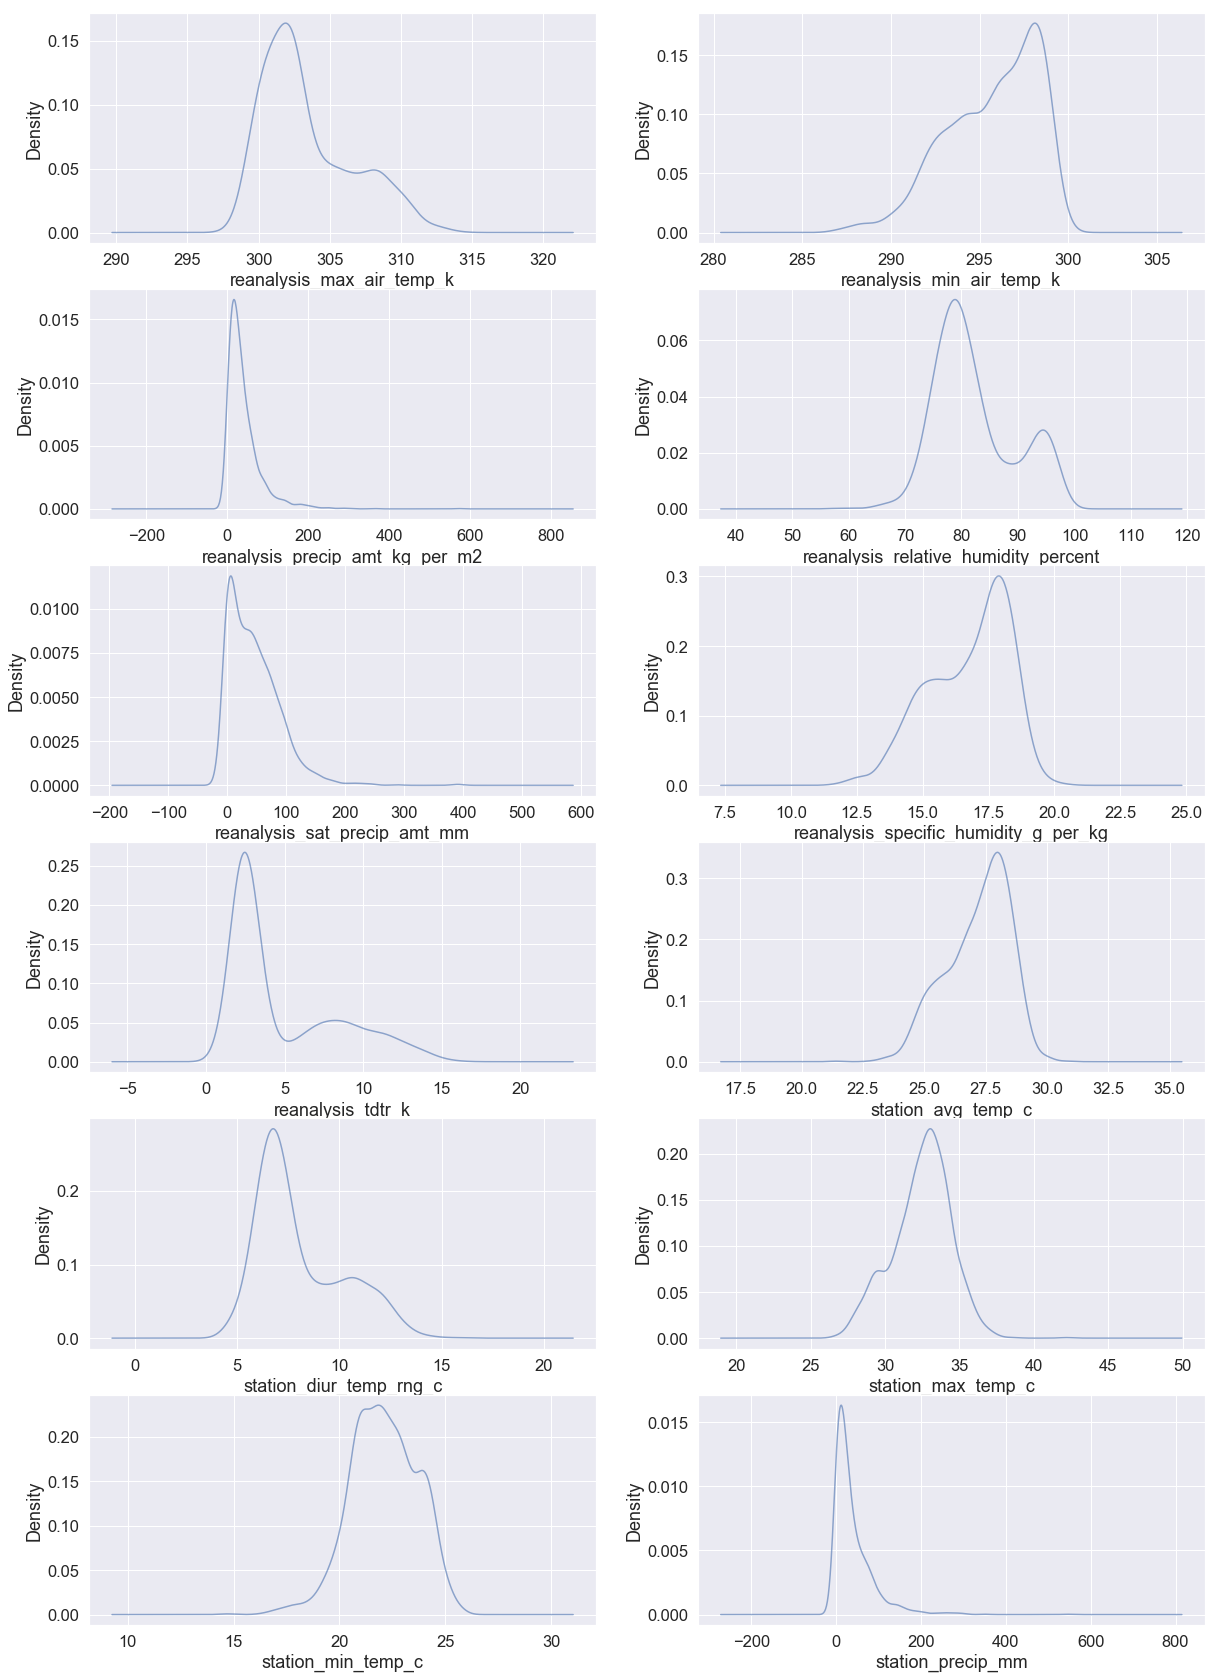

In [121]:
plt.rc("font", size=13)
plt.figure(figsize=(20,50))
alpha=0.6

ax9 = plt.subplot2grid((10,2),(4,0))
features_train.reanalysis_max_air_temp_k.plot(kind="kde",alpha=alpha)
ax9.set_xlabel("reanalysis_max_air_temp_k")

ax10 = plt.subplot2grid((10,2),(4,1))
features_train.reanalysis_min_air_temp_k.plot(kind="kde",alpha=alpha)
ax10.set_xlabel("reanalysis_min_air_temp_k")


ax11 = plt.subplot2grid((10,2),(5,0))
features_train.reanalysis_precip_amt_kg_per_m2.plot(kind="kde",alpha=alpha)
ax11.set_xlabel("reanalysis_precip_amt_kg_per_m2")

ax12 = plt.subplot2grid((10,2),(5,1))
features_train.reanalysis_relative_humidity_percent.plot(kind="kde",alpha=alpha)
ax12.set_xlabel("reanalysis_relative_humidity_percent")


ax13 = plt.subplot2grid((10,2),(6,0))
features_train.reanalysis_sat_precip_amt_mm.plot(kind="kde",alpha=alpha)
ax13.set_xlabel("reanalysis_sat_precip_amt_mm")

ax14 = plt.subplot2grid((10,2),(6,1))
features_train.reanalysis_specific_humidity_g_per_kg.plot(kind="kde",alpha=alpha)
ax14.set_xlabel("reanalysis_specific_humidity_g_per_kg")


ax15 = plt.subplot2grid((10,2),(7,0))
features_train.reanalysis_tdtr_k.plot(kind="kde",alpha=alpha)
ax15.set_xlabel("reanalysis_tdtr_k")

ax16 = plt.subplot2grid((10,2),(7,1))
features_train.station_avg_temp_c.plot(kind="kde",alpha=alpha)
ax16.set_xlabel("station_avg_temp_c")


ax17 = plt.subplot2grid((10,2),(8,0))
features_train.station_diur_temp_rng_c.plot(kind="kde",alpha=alpha)
ax17.set_xlabel("station_diur_temp_rng_c")

ax18 = plt.subplot2grid((10,2),(8,1))
features_train.station_max_temp_c.plot(kind="kde",alpha=alpha)
ax18.set_xlabel("station_max_temp_c")


ax19 = plt.subplot2grid((10,2),(9,0))
features_train.station_min_temp_c.plot(kind="kde",alpha=alpha)
ax19.set_xlabel("station_min_temp_c")

ax20 = plt.subplot2grid((10,2),(9,1))
features_train.station_precip_mm.plot(kind="kde",alpha=alpha)
ax20.set_xlabel("station_precip_mm")

Text(0.5, 0, 'Time')

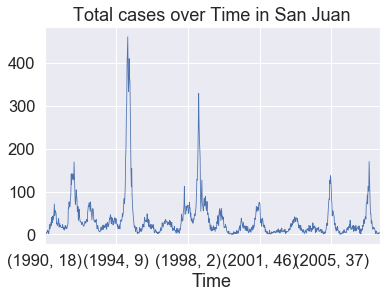

In [118]:
#Total Cases over Time
(sj_train_labels
     .total_cases
     .plot
     .line(lw=0.8))

plt.title('Total cases over Time in San Juan')
plt.xlabel('Time')

Text(0.5, 0, 'Time')

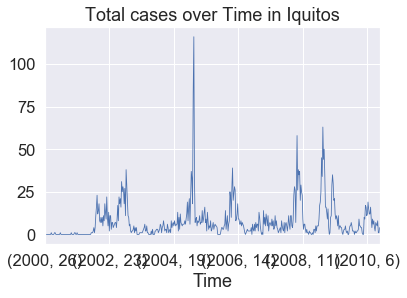

In [91]:
(iq_train_labels
     .total_cases
     .plot
     .line(lw=0.8))

plt.title('Total cases over Time in Iquitos')
plt.xlabel('Time')

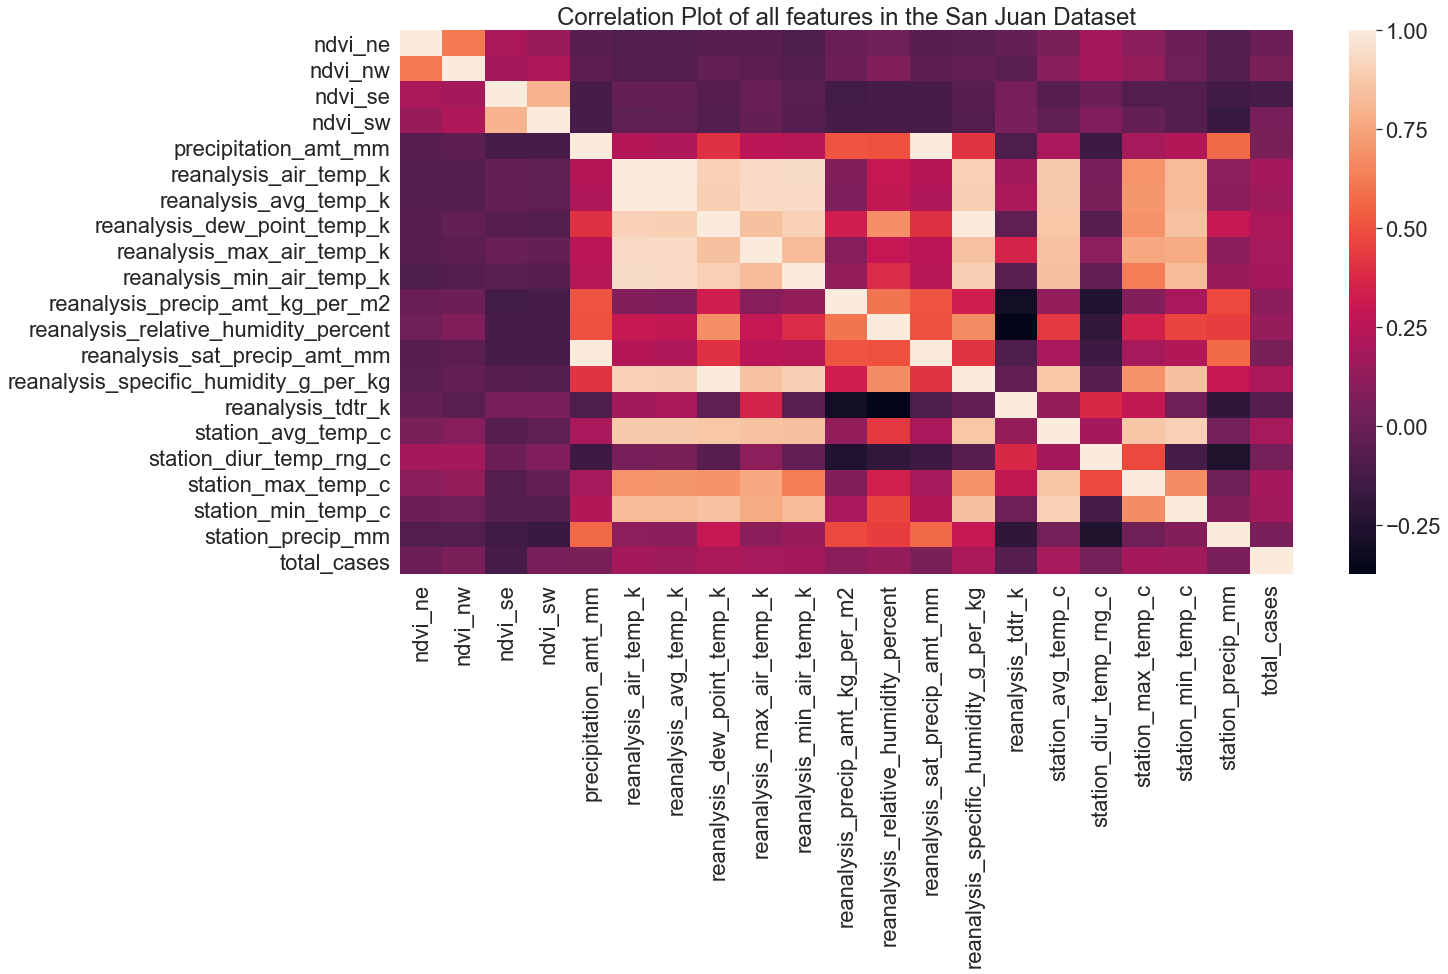

In [33]:
#Correlations
sj_train_features['total_cases'] = sj_train_labels['total_cases']

sj_corr = sj_train_features.corr()

sns.set(font_scale = 2)
plt.figure(figsize=(20, 10))

sns.heatmap(sj_corr)
plt.title('Correlation Plot of all features in the San Juan Dataset')
plt.show()

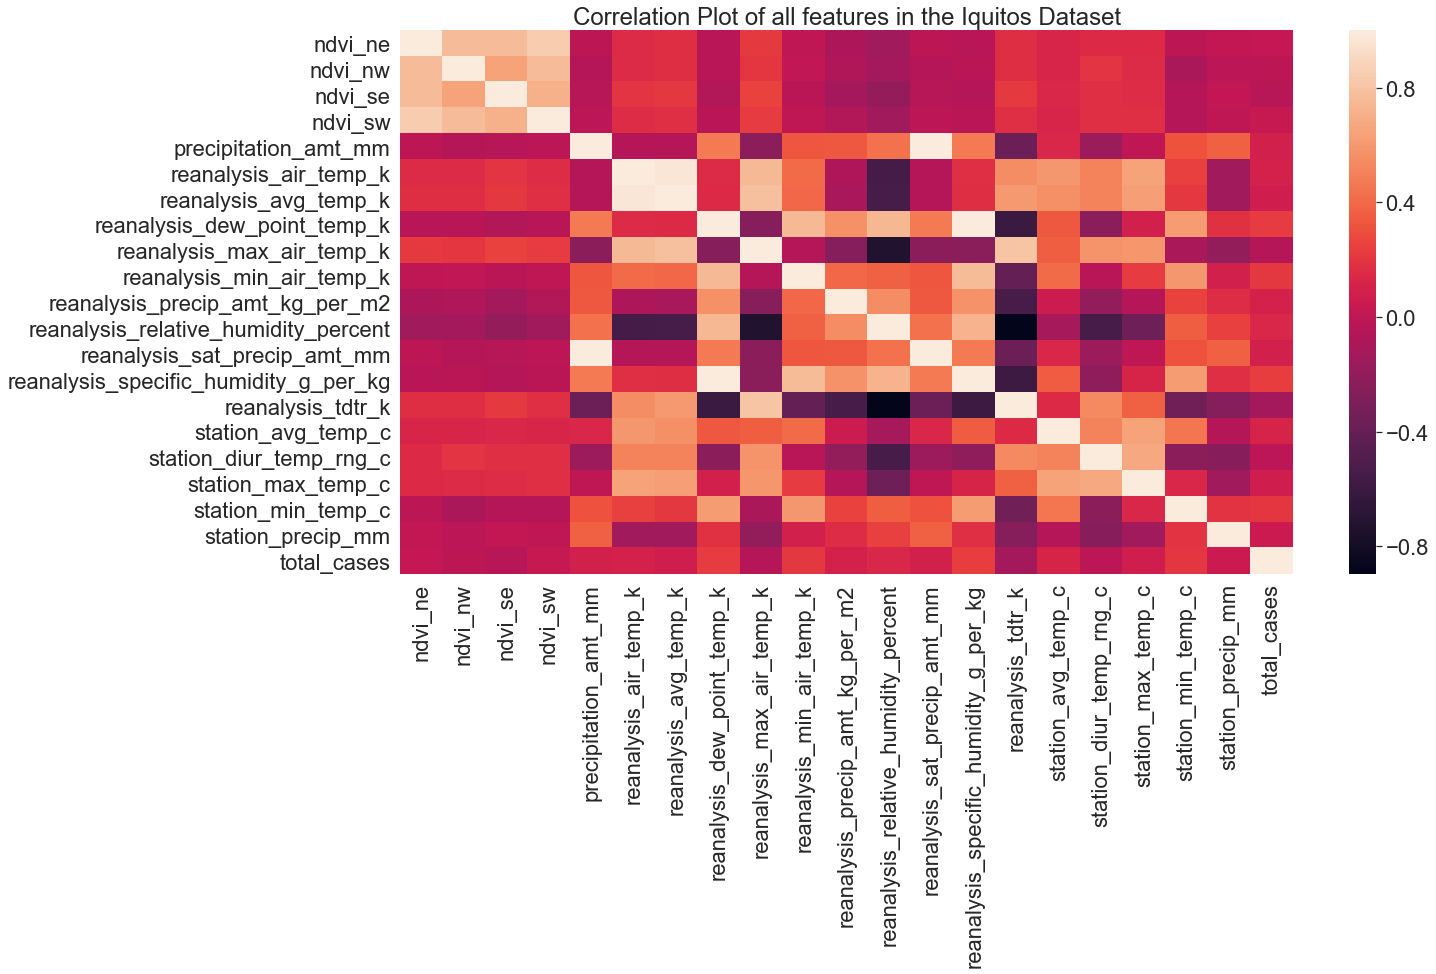

In [34]:
iq_train_features['total_cases'] = iq_train_labels['total_cases']

iq_corr = iq_train_features.corr()

plt.figure(figsize=(20, 10))

sns.heatmap(iq_corr)
plt.title('Correlation Plot of all features in the Iquitos Dataset')
plt.show()

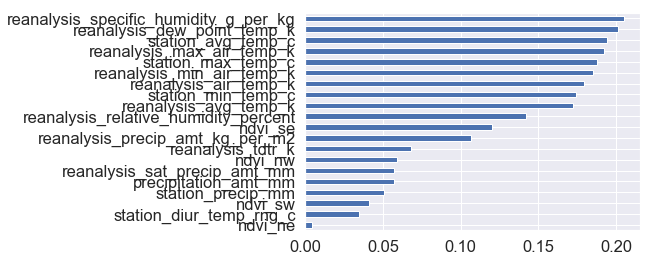

In [35]:
sns.set(font_scale = 1.5)
(abs(sj_corr)
 .total_cases
 .drop('total_cases')
 .sort_values()
 .plot
 .barh())

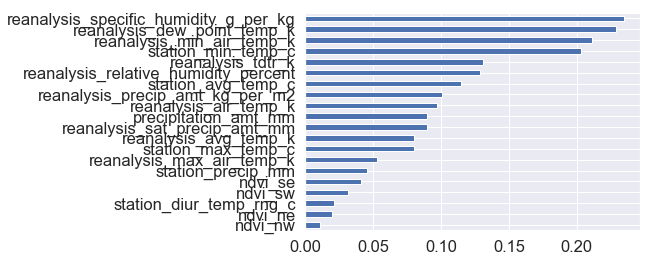

In [36]:
sns.set(font_scale = 1.5)
(abs(iq_corr)
 .total_cases
 .drop('total_cases')
 .sort_values()
 .plot
 .barh())

In [40]:
#Time Series Model
#Import Data
TSsj = pd.DataFrame(sj_train_labels, columns = ['total_cases']) 
TSsj['week_start_date'] = sj_train_features.week_start_date
TSsj.index = pd.to_datetime(TSsj.week_start_date)
del TSsj['week_start_date']

In [38]:
TSiq = pd.DataFrame(iq_train_labels, columns = ['total_cases']) 
TSiq['week_start_date'] = iq_train_features.week_start_date
TSiq.index = pd.to_datetime(TSiq.week_start_date)
del TSiq['week_start_date']

In [54]:
#Build models and find parameters
#Model 1 
TSsj_model = auto_arima(TSsj, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=7479.705, BIC=7503.843, Fit time=2.393 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=8195.210, BIC=8204.865, Fit time=0.048 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=7836.080, BIC=7855.391, Fit time=0.635 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=7489.616, BIC=7508.926, Fit time=1.818 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=7474.782, BIC=7503.747, Fit time=1.784 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=7825.332, BIC=7849.470, Fit time=1.020 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=7476.123, BIC=7509.917, Fit time=8.276 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=8145.942, BIC=8165.253, Fit time=0.410 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(2, 1, 2, 12); AIC=7478.837, BIC=7517.458, Fit time=4.748 seconds
Fit ARIMA: order=(0, 1, 1) s

In [55]:
TSiq_model = auto_arima(TSiq, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=3493.188, BIC=3514.330, Fit time=1.823 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=3884.828, BIC=3893.285, Fit time=0.042 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=3726.244, BIC=3743.158, Fit time=0.351 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=3520.037, BIC=3536.951, Fit time=0.956 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=3494.866, BIC=3520.237, Fit time=2.397 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=3814.966, BIC=3831.880, Fit time=0.867 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=3494.834, BIC=3520.205, Fit time=6.602 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=3497.149, BIC=3526.749, Fit time=3.403 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=3497.844, BIC=3523.215, Fit time=1.717 seconds
Fit ARIMA: order=(1, 1, 0) s

In [56]:
print(TSsj_model.aic())

7474.781586629675


In [57]:
print(TSiq_model.aic())

3493.187923201399


In [59]:
#Split data
TS_sj_train= TSsj.ix[:720, :]
TS_sj_cv= TSsj.ix[721:, :]

In [60]:
TS_iq_train= TSiq.ix[:350, :]
TS_iq_cv= TSiq.ix[351:, :]

In [107]:
#Fit model
tsmodel_fit_sj=TSsj_model.fit(TS_sj_train)

In [108]:
print(tsmodel_fit_sj.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                  720
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -2896.041
Date:                            Sun, 05 May 2019   AIC                           5804.082
Time:                                    03:50:43   BIC                           5831.449
Sample:                                         0   HQIC                          5814.656
                                            - 720                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0027      0.017     -0.154      0.878      -0.037       0.031
ar.L1          0.6999      0.047   

In [109]:
tsmodel_fit_iq=TSiq_model.fit(TS_iq_train)

In [110]:
print(tsmodel_fit_iq.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                  350
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -1171.197
Date:                            Sun, 05 May 2019   AIC                           2352.393
Time:                                    03:50:46   BIC                           2371.494
Sample:                                         0   HQIC                          2360.007
                                            - 350                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0019      0.007     -0.270      0.787      -0.016       0.012
ar.L1          0.5859      0.035   

In [63]:
#Validation
ts_sj_pred = TSsj_model.predict(n_periods=len(TS_sj_cv))
ts_sj_pred = pd.DataFrame(ts_sj_pred,index = TS_sj_cv.index,columns=['Prediction'])
mae_sj = eval_measures.meanabs(ts_sj_pred.Prediction, TS_sj_cv.total_cases)
mae_sj

41.02476202298951

In [64]:
ts_iq_pred = TSiq_model.predict(n_periods=len(TS_iq_cv))
ts_iq_pred = pd.DataFrame(ts_iq_pred,index = TS_iq_cv.index,columns=['Prediction'])
mae_iq = eval_measures.meanabs(ts_iq_pred.Prediction, TS_iq_cv.total_cases)
mae_iq

10.02377131966344

In [94]:
#Split data
X_sj = sj_train_features
y_sj = sj_train_labels['total_cases']
X_sj_train, y_sj_train = X_sj.ix[:720, :], y_sj[0:720]
X_sj_cv, y_sj_cv = X_sj.ix[721:, :], y_sj[721:]

In [95]:
X_iq = iq_train_features
y_iq = iq_train_labels['total_cases'] 
X_iq_train, y_iq_train = X_iq.ix[:350, :], y_iq[0:350]
X_iq_cv, y_iq_cv = X_iq.ix[351:, :], y_iq[351:]

In [96]:
#Feature selection, Only select top 5 variables with more significant correlations.
imptVar = abs(iq_corr).total_cases.drop('total_cases').sort_values(ascending = False).index[0:5]

In [97]:
imptVar

Index(['reanalysis_specific_humidity_g_per_kg', 'reanalysis_dew_point_temp_k',
       'reanalysis_min_air_temp_k', 'station_min_temp_c', 'reanalysis_tdtr_k'],
      dtype='object')

In [146]:
X_sj_temp_train = X_sj_train[imptVar] 
X_sj_temp_cv = X_sj_cv[imptVar]
X_sj_temp_test = sj_test_features[imptVar]

X_iq_temp_train = X_iq_train[imptVar] 
X_iq_temp_cv = X_iq_cv[imptVar]
X_iq_temp_test = iq_test_features[imptVar]

X_sj_temp_test.shape


(260, 5)

In [144]:
adf_sj_test = adfuller(X_sj_temp_train.y)
adf_iq_test = adfuller(X_iq_temp_train.y)
    
print('ADF Statistic: %f' % adf_sj_test[0])
print('p-value: %f' % adf_sj_test[1])
print('Critical Values:' )
for key, value in adf_sj_test[4].items():
    print('\t%s: %.3f' % (key, value))
    
print('ADF Statistic: %f' % adf_iq_test[0])
print('p-value: %f' % adf_iq_test[1])
print('Critical Values:' )
for key, value in adf_iq_test[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.858365
p-value: 0.000042
Critical Values:
	1%: -3.440
	5%: -2.866
	10%: -2.569
ADF Statistic: -5.025479
p-value: 0.000020
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


In [142]:
X_sj_temp_train['y'] =  y_sj_train.values
X_sj_temp_cv['y'] = y_sj_cv.values

X_iq_temp_train['y'] = y_iq_train.values
X_iq_temp_cv['y'] = y_iq_cv.values

In [143]:
sj_rng = pd.date_range('30/04/1990', periods = len(sj_train_features), freq = 'W')
iq_rng = pd.date_range('26/06/2000', periods = len(iq_train_features), freq = 'W')

In [125]:
X_sj_temp_train.index = sj_rng[:720]
X_sj_temp_cv.index = sj_rng[721:]

X_iq_temp_train.index = iq_rng[:350]
X_iq_temp_cv.index = iq_rng[351:]

In [129]:
#Linear Regression 
reg = lm.LinearRegression(fit_intercept=True,normalize=True)
reg_sj=reg.fit(X_sj_temp_train.fillna(0),X_sj_temp_train['y'])
print(reg_sj.intercept_)
reg_sj.coef_

-4.973799150320701e-14


array([-1.72685185e-14,  9.05729305e-15, -7.64084337e-15, -3.76990028e-15,
        6.48981517e-15,  1.00000000e+00])

In [147]:
Y_sj_predicted=reg_sj.predict(X_sj_temp_test.fillna(0))

ValueError: shapes (260,5) and (6,) not aligned: 5 (dim 1) != 6 (dim 0)

In [148]:
from sklearn import metrics
from sklearn.metrics import r2_score
metrics.mean_squared_error(y_true=X_sj_temp_train['y'], y_pred=Y_sj_predicted)

KeyError: 'y'